In [34]:
import pandas as pd

url = 'https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv'

df = pd.read_csv(url)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [35]:
df.shape

(1338, 7)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [37]:
procesed_data = df.drop_duplicates()

En principio creo que todas las columnas son relevantes asique no eliminaré ninguna

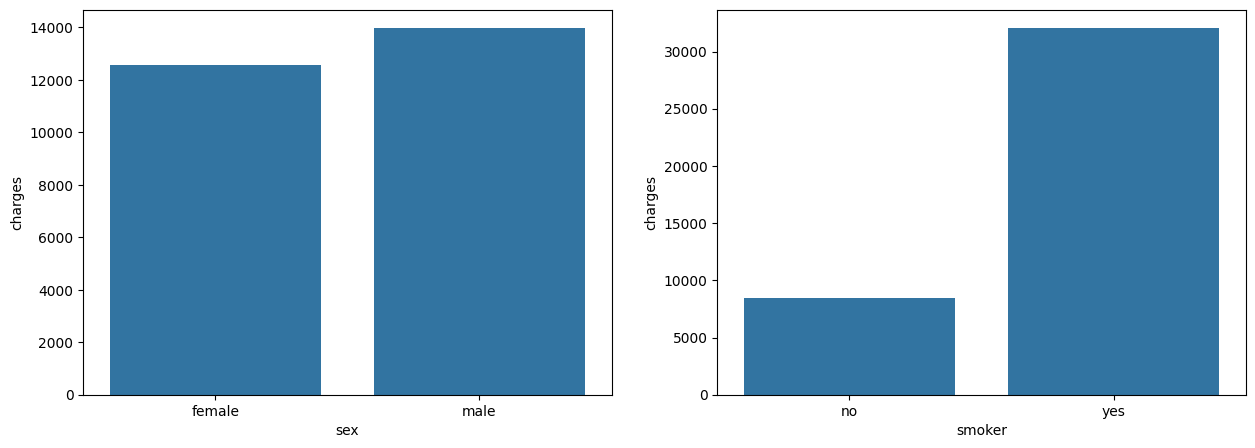

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

sex_to_charges = procesed_data.groupby('sex')['charges'].mean().reset_index()
smoker_to_charges = procesed_data.groupby('smoker')['charges'].mean().reset_index()

fig, axis = plt.subplots(1, 2, figsize = (15, 5))

sns.barplot(ax = axis[0], data=sex_to_charges, x="sex", y="charges")
sns.barplot(ax = axis[1], data=smoker_to_charges, x="smoker", y="charges")

plt.show()

Los hombres parecen pagar un poco más. Los fumadores pagan muchisimo más que los no fumadores

/tmp/ipykernel_2187/4290841924.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  procesed_data["sex"] = pd.factorize(procesed_data["sex"])[0]
/tmp/ipykernel_2187/4290841924.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  procesed_data["smoker"] = pd.factorize(procesed_data["smoker"])[0]
/tmp/ipykernel_2187/4290841924.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

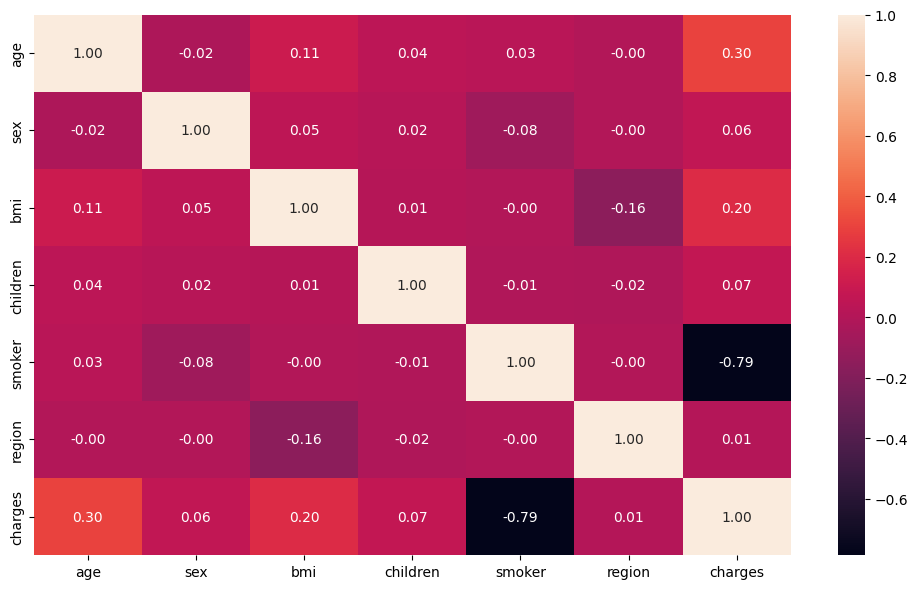

In [39]:
#Primero convertimos las variables categóricas a numéricas
procesed_data["sex"] = pd.factorize(procesed_data["sex"])[0]
procesed_data["smoker"] = pd.factorize(procesed_data["smoker"])[0]
procesed_data["region"] = pd.factorize(procesed_data["region"])[0]

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(procesed_data[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Claramente el factor que más influye es si es fumador o no, la edad y el bmi también juegan un papel relevante

In [40]:
procesed_data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.795064,1.483919,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,1.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,1.000000,1.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,1.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


Solo parece haber ouliers en la columna charges, voy a explorarlo más en detalle

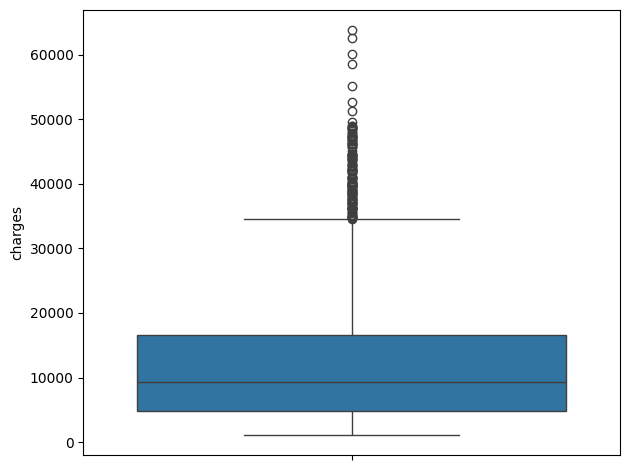

In [41]:
fig, axis = plt.subplots()

sns.boxplot(data = procesed_data, y = "charges")

plt.tight_layout()

plt.show()

In [42]:
procesed_data.loc[procesed_data['charges'] > 45000]

,age,sex,bmi,children,smoker,region,charges
34,28,1,36.400,1,0,0,51194.55914
39,60,1,39.900,0,0,0,48173.36100
55,58,1,36.955,2,0,2,47496.49445
94,64,0,31.300,2,0,0,47291.05500
109,63,1,35.090,0,0,1,47055.53210
175,63,0,37.700,0,0,0,48824.45000
251,63,0,32.200,2,0,0,47305.30500
265,46,1,42.350,3,0,1,46151.12450
281,54,1,40.565,3,0,3,48549.17835
288,59,0,36.765,1,0,3,47896.79135


Hay bastantes outliers por encima de 40.000 y 45.000 pero dado que todos eran fumadores y es la variable que más influye en nuestra variable objetivo voy a optar por no eliminarlos

In [44]:
from sklearn.model_selection import train_test_split

num_variables = ['age', 'bmi', 'smoker'] #Solo usaré 3 variables ya que el resto no tenian casi correlación

X = procesed_data.drop("charges", axis = 1)[num_variables]
y = procesed_data["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,age,bmi,smoker
1114,23,24.510,1
968,21,25.745,1
599,52,37.525,1
170,63,41.470,1
275,47,26.600,1


In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train) #Usar la escala del training tanto para el training como para el test

X_train_norm = scaler.transform(X_train) 
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables) #Convertir los datos de nuevo en dataframe

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)

In [46]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_norm, y_train)

LinearRegression()

In [47]:
print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b): {model.coef_}")

Intercepto (a): 13030.203369289053
Coeficientes (b): [ 3524.2627929   1843.75376298 -9232.94085258]


In [52]:
y_pred = model.predict(X_test_norm)

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np 

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"raiz del Error cuadrático medio: {rmse}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

raiz del Error cuadrático medio: 5986.783344847841
Coeficiente de determinación: 0.8049502474643173


Aunque el RMSE es relativamente bajo un r^2 de 0.80 me parece demasiado bajo, asique voy a intentar hacer algunos ajustes al modelo

# 1. Modelo Raw

Modelo sin editar los datos, tan solo normalizándolos

In [55]:
from sklearn.model_selection import train_test_split

num_variables = ['age', 'sex', 'bmi', 'children', 'smoker', 'region'] 

X = procesed_data.drop("charges", axis = 1)[num_variables]
y = procesed_data["charges"]

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
scaler.fit(X_train_raw) #Usar la escala del training tanto para el training como para el test

X_train_norm_raw = scaler.transform(X_train_raw) 
X_train_norm_raw = pd.DataFrame(X_train_norm_raw, index = X_train_raw.index, columns = num_variables) #Convertir los datos de nuevo en dataframe

X_test_norm_raw = scaler.transform(X_test_raw)
X_test_norm_raw = pd.DataFrame(X_test_norm_raw, index = X_test_raw.index, columns = num_variables)

model_raw = LinearRegression()
model_raw.fit(X_train_norm_raw, y_train)
y_pred = model_raw.predict(X_test_norm_raw)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"raiz del Error cuadrático medio: {rmse}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

raiz del Error cuadrático medio: 5957.608799816461
Coeficiente de determinación: 0.8068466322629111


Practicamente el mismo resultado

# 2. Modelo eliminando outliers

In [57]:
filter_data = procesed_data.loc[procesed_data['charges'] < 40000]

filter_data.shape

(1258, 7)

In [59]:
num_variables = ['age', 'sex', 'bmi', 'children', 'smoker', 'region'] #Solo usaré 3 variables ya que el resto no tenian casi correlación

X = filter_data.drop("charges", axis = 1)[num_variables]
y = filter_data["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
scaler.fit(X_train) #Usar la escala del training tanto para el training como para el test

X_train_norm = scaler.transform(X_train) 
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables) #Convertir los datos de nuevo en dataframe

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)

model_filter = LinearRegression()
model_filter.fit(X_train_norm, y_train)
y_pred = model_filter.predict(X_test_norm)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"raiz del Error cuadrático medio: {rmse}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

raiz del Error cuadrático medio: 5291.459230634939
Coeficiente de determinación: 0.7101272237043285


El modelo empeora considerablemente, como indiqué anteriormente al pertenecer todos los outliers a personas fumadoras nos daba información valiosa. Al parecer un coeficiente de determinación de 0.80 es lo mejor que se puede conseguir con este dataframe y este tipo de modelo